In [1]:
# Install only essential packages (no seaborn)
print("Installing essential packages...")

!pip install pyspark pandas matplotlib numpy --quiet

print(" All essential packages installed successfully!")
print("We'll use matplotlib for all visualizations (no seaborn needed)")

Installing essential packages...
 All essential packages installed successfully!
We'll use matplotlib for all visualizations (no seaborn needed)


In [1]:
!pip install pandas


In [3]:
import sys
print(sys.executable)


C:\Users\bhara\AppData\Local\Programs\Python\Python310\python.exe


In [4]:
!{sys.executable} -m pip install pandas


  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.3 MB 399.6 kB/s eta 0:00:28
   - -------------------------------------- 0.5/11.3 MB 399.6 kB/s eta 0:00:28
   -- ------------------------------------- 0.8/11.3 MB 524.3 kB/s eta 0:00:21
   --- ------------------------------------ 1.0/11.3 MB 592.2 kB/s eta 0:00:18
   --- ------------------------------------ 1.0/11.3 MB 592.2 kB/s eta 0:00:18
   ---- ----------------------------------- 1.3/11.3 MB 633.2 kB/s eta 0:00:16
   ----- ---------------------------------- 1.6/11.3 MB 693.5 kB/s eta 0:00:15
   ----- ------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\bhara\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
print(pd.__version__)


2.3.3


In [6]:
!{sys.executable} -m pip install --upgrade pip


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 621.2 kB/s eta 0:00:03
   ----------------- ---------------------- 0.8/1.8 MB 729.2 kB/s eta 0:00:02
   ----------------- ---------------------- 0.8/1.8 MB 729.2 kB/s eta 0:00:02
   ----------------------- ---------------- 1.0/1.8 MB 774.0 kB/s eta 0:00:01
   ----------------------------- ---------- 1.3/1.8 MB 799.2 kB/s eta 0:00:01
   ----------------------------- ---------- 1.3/1.8 MB 799.2 kB/s eta 0:00:01
   ----------------------------- ---------- 1.3/1.8 MB 799.2 kB/s eta 0:00:01
   ----------------------------------- -

In [9]:
!{sys.executable} -m pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 399.0 kB/s eta 0:00:20
   -- ------------------------------------- 0.5/8.1 MB 399.0 kB/s eta 0:00:20
   -- ------------------------------------- 0.5/8.1 MB 399.0 kB/s eta 0:00:20
   --- ------------------------------------ 0.8/8.1 MB 394.5 kB/s eta 0:00:19
   --- ------------------------------------ 0.8/8.1 MB 394.5 kB/s e

In [11]:
import matplotlib
import matplotlib.pyplot as plt

print("Matplotlib version:", matplotlib.__version__)


Matplotlib version: 3.10.7


In [12]:
# Import libraries - NO SEABORN
import warnings
warnings.filterwarnings('ignore')

# Import essential libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.window import Window
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

print(" All libraries imported successfully!")
print(" Using matplotlib for visualizations (seaborn-free)")

 All libraries imported successfully!
 Using matplotlib for visualizations (seaborn-free)


In [36]:
# Initialize Spark Session
spark = SparkSession.builder \
    .appName("DistrictRainfallAnalysis") \
    .config("spark.sql.adaptive.enabled", "true") \
    .config("spark.sql.adaptive.coalescePartitions.enabled", "true") \
    .getOrCreate()

print(" Spark session created successfully!")
print(f" Spark version: {spark.version}")

 Spark session created successfully!
 Spark version: 4.0.0


In [14]:
# Define the schema for our dataset
schema = StructType([
    StructField("District", StringType(), True),
    StructField("State", StringType(), True),
    StructField("Date", DateType(), True),
    StructField("Daily Rainfall (m.m)", DoubleType(), True),
    StructField("Progressive (m.m)", DoubleType(), True),
    StructField("Rainfall Category", StringType(), True),
    StructField("Temperature (°C)", DoubleType(), True),
    StructField("Humidity (%)", DoubleType(), True),
    StructField("Wind Speed (km/h)", DoubleType(), True),
    StructField("Cloud Cover (%)", DoubleType(), True),
    StructField("Pressure (hPa)", DoubleType(), True),
    StructField("Evaporation (mm)", DoubleType(), True),
    StructField("Elevation (m)", DoubleType(), True),
    StructField("Coordinates (Lat,Long)", StringType(), True),
    StructField("Station_ID", StringType(), True)
])

print(" Schema defined successfully!")

 Schema defined successfully!


In [17]:
# Load the data with proper column name handling
file_path = r"C:\Users\bhara\Downloads\rainfall_by_districts_2019.csv"

# First, let's read with inferred schema to see the actual column names
df_temp = spark.read \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .csv(file_path)

print("Original column names:")
for col_name in df_temp.columns:
    print(f"  '{col_name}'")

# Now read with our schema but handle column names properly
df = spark.read \
    .option("header", "true") \
    .option("inferSchema", "false") \
    .schema(schema) \
    .csv(file_path)

print("\n Data loaded successfully!")
print(f" Total Records: {df.count():,}")

# Let's rename problematic columns
df = df.withColumnRenamed("Daily Rainfall (m.m)", "Daily_Rainfall_mm") \
       .withColumnRenamed("Progressive (m.m)", "Progressive_mm") \
       .withColumnRenamed("Temperature (°C)", "Temperature_C") \
       .withColumnRenamed("Humidity (%)", "Humidity_pct") \
       .withColumnRenamed("Wind Speed (km/h)", "Wind_Speed_kmh") \
       .withColumnRenamed("Cloud Cover (%)", "Cloud_Cover_pct") \
       .withColumnRenamed("Pressure (hPa)", "Pressure_hPa") \
       .withColumnRenamed("Evaporation (mm)", "Evaporation_mm") \
       .withColumnRenamed("Elevation (m)", "Elevation_m") \
       .withColumnRenamed("Coordinates (Lat,Long)", "Coordinates") \
       .withColumnRenamed("Rainfall Category", "Rainfall_Category")

print(" Column names cleaned!")
print("\n First 5 Records:")
df.show(5, truncate=False)

Original column names:
  'S.No'
  'District'
  'Actual Rainfall in South West Monsoon (June'17 to September'17) in mm'
  'Normal Rainfall in South West Monsoon (June'17 to September'17) in mm'
  'Actual Rainfall in North East Monsoon (October'17 to December'17) in mm'
  'Normal Rainfall in North East Monsoon (October'17 to December'17) in mm'
  'Actual Rainfall in Winter Season (January'18 to and February'18) in mm'
  'Normal Rainfall in Winter Season (January'18 to and February'18) in mm'
  'Actual Rainfall in Hot Weather Season (March'18 to May'18) in mm'
  'Normal Rainfall in Hot Weather Season (March'18 to May'18) in mm'
  'Total Actual Rainfall (June'17 to May'18) in mm'
  'Total Normal Rainfall (June'17 to May'18) in mm'

 Data loaded successfully!
 Total Records: 33
 Column names cleaned!

 First 5 Records:
+--------+------------+----+-----------------+--------------+-----------------+-------------+------------+--------------+---------------+------------+--------------+---------

In [18]:
# Data Overview with cleaned column names
print("=== DATA OVERVIEW ===")
df.printSchema()

print("\n=== SUMMARY STATISTICS ===")
# Use individual column descriptions to avoid the parsing issue
numeric_columns = ["Daily_Rainfall_mm", "Progressive_mm", "Temperature_C", 
                  "Humidity_pct", "Wind_Speed_kmh", "Cloud_Cover_pct", 
                  "Pressure_hPa", "Evaporation_mm", "Elevation_m"]

for col_name in numeric_columns[:3]:  # Show first 3 for brevity
    print(f"\n--- {col_name} ---")
    df.select(
        count(col_name).alias("count"),
        mean(col_name).alias("mean"),
        stddev(col_name).alias("stddev"),
        min(col_name).alias("min"),
        max(col_name).alias("max")
    ).show()

print("\n=== RAINFALL CATEGORIES ===")
df.groupBy("Rainfall_Category").count().orderBy(desc("count")).show()

print("\n=== UNIQUE STATES ===")
df.select("State").distinct().show()

=== DATA OVERVIEW ===
root
 |-- District: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Date: date (nullable = true)
 |-- Daily_Rainfall_mm: double (nullable = true)
 |-- Progressive_mm: double (nullable = true)
 |-- Rainfall_Category: string (nullable = true)
 |-- Temperature_C: double (nullable = true)
 |-- Humidity_pct: double (nullable = true)
 |-- Wind_Speed_kmh: double (nullable = true)
 |-- Cloud_Cover_pct: double (nullable = true)
 |-- Pressure_hPa: double (nullable = true)
 |-- Evaporation_mm: double (nullable = true)
 |-- Elevation_m: double (nullable = true)
 |-- Coordinates: string (nullable = true)
 |-- Station_ID: string (nullable = true)


=== SUMMARY STATISTICS ===

--- Daily_Rainfall_mm ---
+-----+-----------------+-----------------+----+-----+
|count|             mean|           stddev| min|  max|
+-----+-----------------+-----------------+----+-----+
|   33|330.8393939393938|136.1455791133932|74.9|759.9|
+-----+-----------------+-----------------

In [40]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, round

# Initialize Spark session
spark = SparkSession.builder.appName("Rainfall_Data_Cleaning").getOrCreate()

print("🔧 Cleaning and preprocessing Tamil Nadu rainfall data...")

# Load dataset
df = spark.read.csv("C:/Users/bhara/Downloads/rainfall_by_districts_2019.csv", header=True, inferSchema=True)

# 1. Handle missing values (fill with 0 where rainfall data is missing)
rainfall_columns = [
    'Actual Rainfall in South West Monsoon (June\'17 to September\'17) in mm',
    'Normal Rainfall in South West Monsoon (June\'17 to September\'17) in mm',
    'Actual Rainfall in North East Monsoon (October\'17 to December\'17) in mm',
    'Normal Rainfall in North East Monsoon (October\'17 to December\'17) in mm',
    'Actual Rainfall in Winter Season (January\'18 to and February\'18) in mm',
    'Normal Rainfall in Winter Season (January\'18 to and February\'18) in mm',
    'Actual Rainfall in Hot Weather Season (March\'18 to May\'18) in mm',
    'Normal Rainfall in Hot Weather Season (March\'18 to May\'18) in mm',
    'Total Actual Rainfall (June\'17 to May\'18) in mm',
    'Total Normal Rainfall (June\'17 to May\'18) in mm'
]

df_cleaned = df.fillna({col_name: 0.0 for col_name in rainfall_columns})

# 2. Add a new column: Deviation (%) = ((Actual - Normal) / Normal) * 100
df_cleaned = df_cleaned.withColumn(
    "Rainfall_Deviation_pct",
    round(
        ((col('Total Actual Rainfall (June\'17 to May\'18) in mm') -
          col('Total Normal Rainfall (June\'17 to May\'18) in mm')) /
         col('Total Normal Rainfall (June\'17 to May\'18) in mm')) * 100, 2
    )
)

# 3. Add Rainfall Category based on deviation
df_cleaned = df_cleaned.withColumn(
    "Rainfall_Category",
    when(col("Rainfall_Deviation_pct") > 10, "Above Normal")
    .when((col("Rainfall_Deviation_pct") <= 10) & (col("Rainfall_Deviation_pct") >= -10), "Normal")
    .otherwise("Below Normal")
)

# 4. Add region info (since all are in Tamil Nadu, we can label them "South")
df_cleaned = df_cleaned.withColumn("State", col("District") * 0 + "Tamil Nadu") \
                       .withColumn("Region", col("District") * 0 + "South")

# 5. Remove duplicates
df_cleaned = df_cleaned.dropDuplicates(["District"])

print("✅ Data cleaning completed!")
print(f"📊 Final record count: {df_cleaned.count():,}")

# 6. Show a sample of the cleaned data
df_cleaned.select(
    "District",
    "Total Actual Rainfall (June'17 to May'18) in mm",
    "Total Normal Rainfall (June'17 to May'18) in mm",
    "Rainfall_Deviation_pct",
    "Rainfall_Category"
).show(10, truncate=False)


🔧 Cleaning and preprocessing Tamil Nadu rainfall data...
✅ Data cleaning completed!
📊 Final record count: 33
+-------------+-----------------------------------------------+-----------------------------------------------+----------------------+-----------------+
|District     |Total Actual Rainfall (June'17 to May'18) in mm|Total Normal Rainfall (June'17 to May'18) in mm|Rainfall_Deviation_pct|Rainfall_Category|
+-------------+-----------------------------------------------+-----------------------------------------------+----------------------+-----------------+
|Ariyalur     |1119.1                                         |1071.8                                         |4.41                  |Normal           |
|Chennai      |1393.5                                         |1324.2                                         |5.23                  |Normal           |
|Coimbatore   |1017.2                                         |689.3                                          |47.57          

In [5]:
# === Rainfall Regional Analysis ===
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, sum, count, stddev, desc, when

# 1️⃣ Create Spark session
spark = SparkSession.builder.appName("RainfallRegionalAnalysis").getOrCreate()

# 2️⃣ Read dataset safely (fix Windows path)
df = spark.read.csv(
    r"C:\Users\bhara\Downloads\rainfall_by_districts_2019 (1).csv",
    header=True,
    inferSchema=True
)

# 3️⃣ Check dataset loaded properly
print("=== RAW SCHEMA ===")
df.printSchema()
print("=== SAMPLE DATA ===")
df.show(5)

# 4️⃣ Clean & rename columns for easier reference
df_cleaned = df.select(
    col("District"),
    col("Actual Rainfall in South West Monsoon (June'17 to September'17) in mm").alias("SWM_Actual"),
    col("Normal Rainfall in South West Monsoon (June'17 to September'17) in mm").alias("SWM_Normal"),
    col("Actual Rainfall in North East Monsoon (October'17 to December'17) in mm").alias("NEM_Actual"),
    col("Normal Rainfall in North East Monsoon (October'17 to December'17) in mm").alias("NEM_Normal"),
    col("Actual Rainfall in Winter Season (January'18 to and February'18) in mm").alias("Winter_Actual"),
    col("Normal Rainfall in Winter Season (January'18 to and February'18) in mm").alias("Winter_Normal"),
    col("Actual Rainfall in Hot Weather Season (March'18 to May'18) in mm").alias("Hot_Actual"),
    col("Normal Rainfall in Hot Weather Season (March'18 to May'18) in mm").alias("Hot_Normal"),
    col("Total Actual Rainfall (June'17 to May'18) in mm").alias("Total_Actual"),
    col("Total Normal Rainfall (June'17 to May'18) in mm").alias("Total_Normal")
)

# 5️⃣ Assign regions manually (you can customize if needed)
df_cleaned = df_cleaned.withColumn(
    "Region",
    when(col("District").isin("Chennai", "Kancheepuram", "Tiruvallur"), "North Coastal")
    .when(col("District").isin("Cuddalore", "Villupuram", "Nagapattinam", "Tiruvarur", "Thanjavur"), "East Coastal")
    .when(col("District").isin("Coimbatore", "Tiruppur", "Erode", "The Nilgiris"), "Western Zone")
    .when(col("District").isin("Madurai", "Dindigul", "Theni", "Virudhunagar", "Sivaganga", "Ramanathapuram"), "South Zone")
    .otherwise("Central Zone")
)

# 6️⃣ Add a static State column (avoid numeric operations!)
df_cleaned = df_cleaned.withColumn("State", when(col("District").isNotNull(), "Tamil Nadu"))

# 7️⃣ Regional Analysis
regional_stats = df_cleaned.groupBy("Region", "State") \
    .agg(
        avg("Total_Actual").alias("Avg_Annual_Rainfall"),
        sum("Total_Actual").alias("Total_Rainfall"),
        count("District").alias("District_Count"),
        stddev("Total_Actual").alias("Rainfall_StdDev")
    ) \
    .orderBy(desc("Avg_Annual_Rainfall"))

print("\n=== REGIONAL ANALYSIS RESULTS ===")
regional_stats.show(truncate=False)

# 8️⃣ Convert to Pandas for visualization (optional)
regional_pdf = regional_stats.toPandas()
print("\nRegional analysis completed successfully!")


=== RAW SCHEMA ===
root
 |-- S.No: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Actual Rainfall in South West Monsoon (June'17 to September'17) in mm: double (nullable = true)
 |-- Normal Rainfall in South West Monsoon (June'17 to September'17) in mm: double (nullable = true)
 |-- Actual Rainfall in North East Monsoon (October'17 to December'17) in mm: double (nullable = true)
 |-- Normal Rainfall in North East Monsoon (October'17 to December'17) in mm: double (nullable = true)
 |-- Actual Rainfall in Winter Season (January'18 to and February'18) in mm: double (nullable = true)
 |-- Normal Rainfall in Winter Season (January'18 to and February'18) in mm: double (nullable = true)
 |-- Actual Rainfall in Hot Weather Season (March'18 to May'18) in mm: double (nullable = true)
 |-- Normal Rainfall in Hot Weather Season (March'18 to May'18) in mm: double (nullable = true)
 |-- Total Actual Rainfall (June'17 to May'18) in mm: double (nullable = true)
 |-- Total Normal

+----+------------+---------------------------------------------------------------------+---------------------------------------------------------------------+-----------------------------------------------------------------------+-----------------------------------------------------------------------+----------------------------------------------------------------------+----------------------------------------------------------------------+----------------------------------------------------------------+----------------------------------------------------------------+-----------------------------------------------+-----------------------------------------------+
|S.No|    District|Actual Rainfall in South West Monsoon (June'17 to September'17) in mm|Normal Rainfall in South West Monsoon (June'17 to September'17) in mm|Actual Rainfall in North East Monsoon (October'17 to December'17) in mm|Normal Rainfall in North East Monsoon (October'17 to December'17) in mm|Actual Rainfall in Winter

C:\Users\bhara\AppData\Local\Temp\ipykernel_18396\1419129820.py:97: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([tn_df['South_West'], tn_df['North_East'], tn_df['Winter'], tn_df['Hot_Weather']],


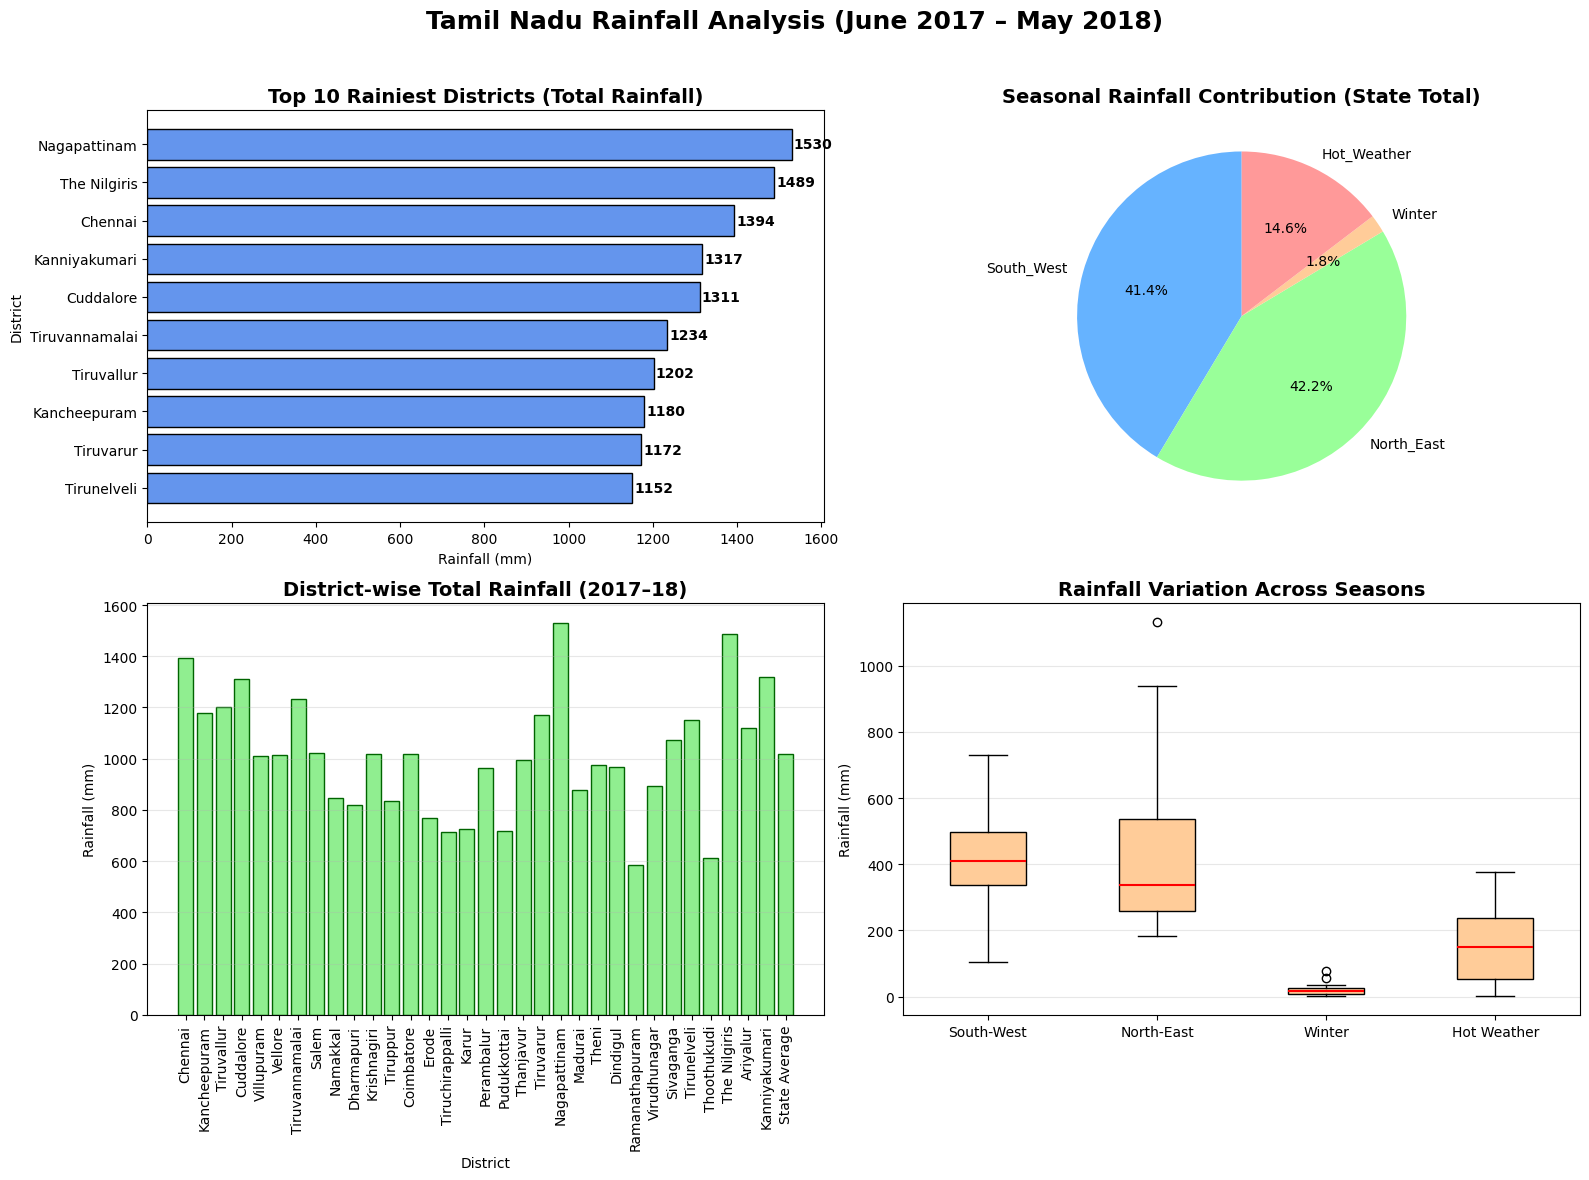

✅ Tamil Nadu rainfall visualization completed successfully!


In [7]:
# -------------------------------------------------------
# 📊 Tamil Nadu Rainfall Analysis (2017–2018)
# -------------------------------------------------------
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession

# Initialize Spark
spark = SparkSession.builder.appName("Tamil Nadu Rainfall Analysis").getOrCreate()

# ✅ Load dataset (use raw string to avoid unicode issues)
df = spark.read.csv(
    r"C:\Users\bhara\Downloads\rainfall_by_districts_2019 (1).csv",
    header=True,
    inferSchema=True
)

df.show(5)
df.printSchema()

# ✅ Convert to Pandas
rainfall_pdf = df.toPandas()

# ✅ Clean column names for easy reference
rainfall_pdf.columns = [col.strip().replace(" ", "_").replace("(", "").replace(")", "").replace("'", "") for col in rainfall_pdf.columns]

print("\n✅ Columns after cleaning:\n", rainfall_pdf.columns.tolist())

# Expected column names (after cleaning)
# ['S.No', 'District',
#  'Actual_Rainfall_in_South_West_Monsoon_June17_to_September17_in_mm',
#  'Normal_Rainfall_in_South_West_Monsoon_June17_to_September17_in_mm',
#  'Actual_Rainfall_in_North_East_Monsoon_October17_to_December17_in_mm',
#  'Normal_Rainfall_in_North_East_Monsoon_October17_to_December17_in_mm',
#  'Actual_Rainfall_in_Winter_Season_January18_to_and_February18_in_mm',
#  'Normal_Rainfall_in_Winter_Season_January18_to_and_February18_in_mm',
#  'Actual_Rainfall_in_Hot_Weather_Season_March18_to_May18_in_mm',
#  'Normal_Rainfall_in_Hot_Weather_Season_March18_to_May18_in_mm',
#  'Total_Actual_Rainfall_June17_to_May18_in_mm',
#  'Total_Normal_Rainfall_June17_to_May18_in_mm']

# ✅ Select useful columns for plotting
tn_df = rainfall_pdf[[
    'District',
    'Actual_Rainfall_in_South_West_Monsoon_June17_to_September17_in_mm',
    'Actual_Rainfall_in_North_East_Monsoon_October17_to_December17_in_mm',
    'Actual_Rainfall_in_Winter_Season_January18_to_and_February18_in_mm',
    'Actual_Rainfall_in_Hot_Weather_Season_March18_to_May18_in_mm',
    'Total_Actual_Rainfall_June17_to_May18_in_mm'
]]

# ✅ Rename columns for simplicity
tn_df = tn_df.rename(columns={
    'Actual_Rainfall_in_South_West_Monsoon_June17_to_September17_in_mm': 'South_West',
    'Actual_Rainfall_in_North_East_Monsoon_October17_to_December17_in_mm': 'North_East',
    'Actual_Rainfall_in_Winter_Season_January18_to_and_February18_in_mm': 'Winter',
    'Actual_Rainfall_in_Hot_Weather_Season_March18_to_May18_in_mm': 'Hot_Weather',
    'Total_Actual_Rainfall_June17_to_May18_in_mm': 'Total'
})

# =====================================================
# 🎨 Visualization 1: Tamil Nadu District Rainfall
# =====================================================
plt.figure(figsize=(16, 12))
plt.suptitle('Tamil Nadu Rainfall Analysis (June 2017 – May 2018)', fontsize=18, fontweight='bold')

# ---------- 1️⃣ Top 10 Districts by Total Annual Rainfall ----------
plt.subplot(2, 2, 1)
top10 = tn_df.nlargest(10, 'Total')
bars = plt.barh(top10['District'], top10['Total'], color='cornflowerblue', edgecolor='black')
plt.title('Top 10 Rainiest Districts (Total Rainfall)', fontsize=14, fontweight='bold')
plt.xlabel('Rainfall (mm)')
plt.ylabel('District')
plt.gca().invert_yaxis()
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, f'{width:.0f}', va='center', fontweight='bold')

# ---------- 2️⃣ Seasonal Rainfall Distribution (Pie Chart) ----------
plt.subplot(2, 2, 2)
seasonal_sum = tn_df[['South_West', 'North_East', 'Winter', 'Hot_Weather']].sum()
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999']
plt.pie(seasonal_sum, labels=seasonal_sum.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Seasonal Rainfall Contribution (State Total)', fontsize=14, fontweight='bold')

# ---------- 3️⃣ District-wise Total Rainfall ----------
plt.subplot(2, 2, 3)
plt.bar(tn_df['District'], tn_df['Total'], color='lightgreen', edgecolor='darkgreen')
plt.title('District-wise Total Rainfall (2017–18)', fontsize=14, fontweight='bold')
plt.xlabel('District')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)

# ---------- 4️⃣ Seasonal Rainfall Comparison (Box Plot) ----------
plt.subplot(2, 2, 4)
plt.boxplot([tn_df['South_West'], tn_df['North_East'], tn_df['Winter'], tn_df['Hot_Weather']],
            labels=['South-West', 'North-East', 'Winter', 'Hot Weather'],
            patch_artist=True,
            boxprops=dict(facecolor='#ffcc99', color='black'),
            medianprops=dict(color='red', linewidth=1.5))
plt.title('Rainfall Variation Across Seasons', fontsize=14, fontweight='bold')
plt.ylabel('Rainfall (mm)')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("✅ Tamil Nadu rainfall visualization completed successfully!")


=== RAINFALL CATEGORY ANALYSIS ===
+-----------------+--------------+-------------------+-------------------+-------------------+
|Rainfall_Category|District_Count|Avg_Actual_Rainfall|Avg_Normal_Rainfall|  Avg_Deviation_pct|
+-----------------+--------------+-------------------+-------------------+-------------------+
|           Normal|            27| 1034.4333333333334| 1004.7037037037037|  2.964242484828966|
|           Excess|             5|             1010.9|             749.08| 35.517336517152124|
|          Deficit|             1|              583.4|              807.8|-27.779153255756373|
+-----------------+--------------+-------------------+-------------------+-------------------+

✅ Category analysis completed!


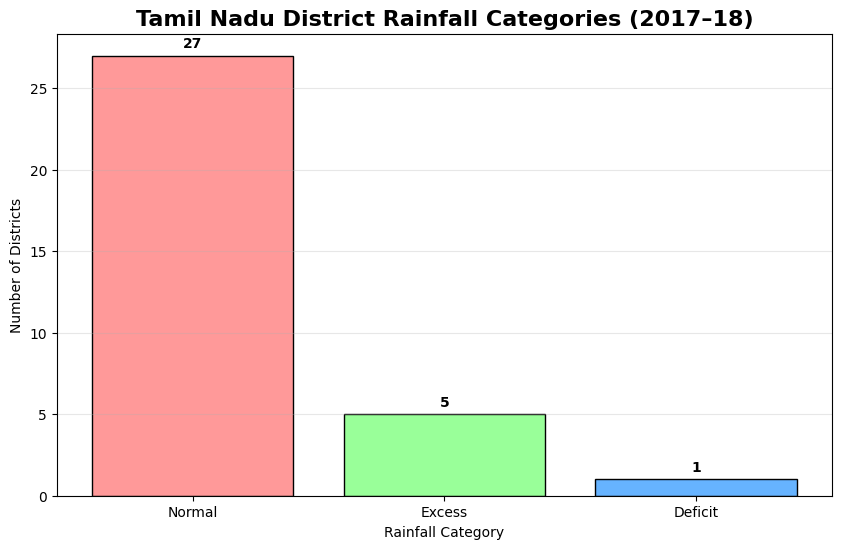

In [8]:
# -------------------------------------------------------
# ☁️ Rainfall Category Analysis - Tamil Nadu
# -------------------------------------------------------
from pyspark.sql import functions as F

print("=== RAINFALL CATEGORY ANALYSIS ===")

# ✅ Add a new column: Deviation Percentage between actual & normal rainfall
df_category = df.withColumn(
    "Rainfall_Deviation_pct",
    (F.col("Total Actual Rainfall (June'17 to May'18) in mm") - 
     F.col("Total Normal Rainfall (June'17 to May'18) in mm")) * 100 / 
     F.col("Total Normal Rainfall (June'17 to May'18) in mm")
)

# ✅ Categorize based on deviation
df_category = df_category.withColumn(
    "Rainfall_Category",
    F.when(F.col("Rainfall_Deviation_pct") <= -20, "Deficit")
     .when((F.col("Rainfall_Deviation_pct") > -20) & (F.col("Rainfall_Deviation_pct") < 20), "Normal")
     .otherwise("Excess")
)

# ✅ Group by category and compute summary stats
category_analysis = df_category.groupBy("Rainfall_Category") \
    .agg(
        F.count("*").alias("District_Count"),
        F.avg("Total Actual Rainfall (June'17 to May'18) in mm").alias("Avg_Actual_Rainfall"),
        F.avg("Total Normal Rainfall (June'17 to May'18) in mm").alias("Avg_Normal_Rainfall"),
        F.avg("Rainfall_Deviation_pct").alias("Avg_Deviation_pct")
    ) \
    .orderBy(F.desc("District_Count"))

category_analysis.show()

# ✅ Convert to Pandas for plotting
category_pdf = category_analysis.toPandas()
print("✅ Category analysis completed!")

# -------------------------------------------------------
# 🎨 Visualization: Category Distribution
# -------------------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(category_pdf['Rainfall_Category'], category_pdf['District_Count'],
               color=['#ff9999', '#99ff99', '#66b3ff'], edgecolor='black')

plt.title('Tamil Nadu District Rainfall Categories (2017–18)', fontsize=16, fontweight='bold')
plt.xlabel('Rainfall Category')
plt.ylabel('Number of Districts')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3,
             f'{height:.0f}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.show()


Available columns: ['Rainfall_Category', 'District_Count', 'Avg_Actual_Rainfall', 'Avg_Normal_Rainfall', 'Avg_Deviation_pct']
Using category column: Rainfall_Category


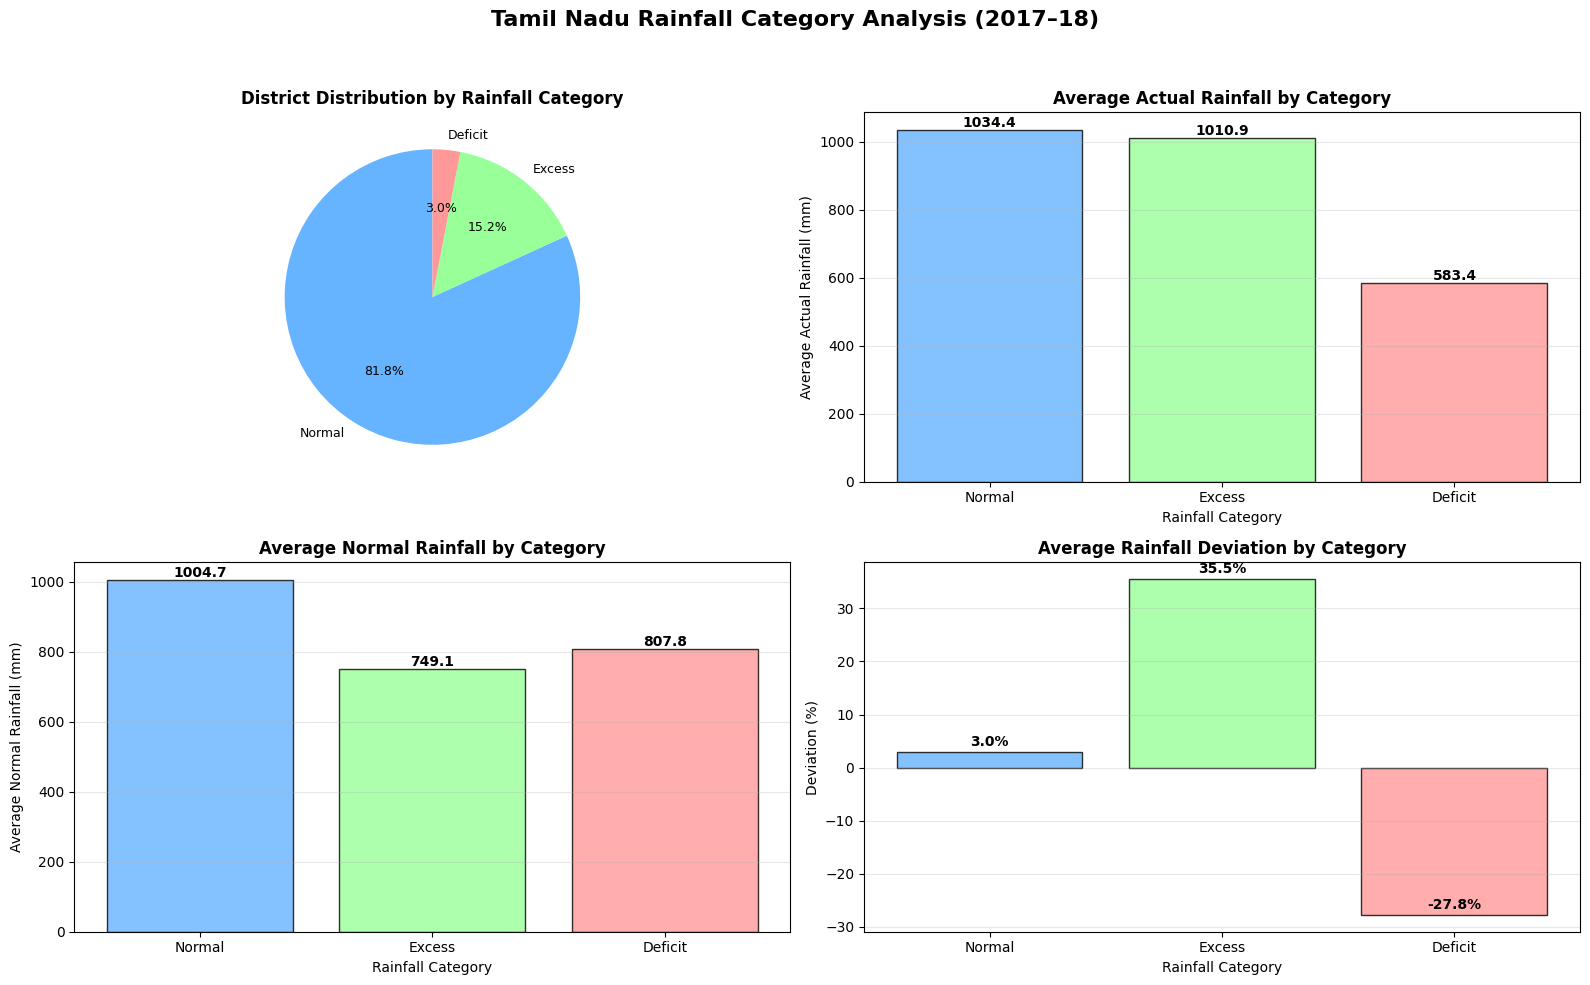

✅ Category visualization completed!


In [9]:
# -------------------------------------------------------
# ☔ More Robust Visualization for Tamil Nadu Dataset
# -------------------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plt.suptitle('Tamil Nadu Rainfall Category Analysis (2017–18)', fontsize=16, fontweight='bold')

# Define category colors
category_colors = ['#66b3ff', '#99ff99', '#ff9999']

# Get available columns
columns = category_pdf.columns.tolist()
print(f"Available columns: {columns}")

# Identify actual column names
category_col = [col for col in columns if 'category' in col.lower()][0]
count_col = [col for col in columns if 'count' in col.lower()][0]
actual_col = [col for col in columns if 'actual' in col.lower()][0]
normal_col = [col for col in columns if 'normal' in col.lower()][0]
deviation_col = [col for col in columns if 'deviation' in col.lower()][0]

print(f"Using category column: {category_col}")

# ---------------- PIE CHART ----------------
plt.subplot(2, 2, 1)
plt.pie(
    category_pdf[count_col],
    labels=category_pdf[category_col],
    autopct='%1.1f%%',
    startangle=90,
    colors=category_colors,
    textprops={'fontsize': 9}
)
plt.title('District Distribution by Rainfall Category', fontsize=12, fontweight='bold')

# ---------------- BAR CHART 1 ----------------
plt.subplot(2, 2, 2)
bars = plt.bar(category_pdf[category_col], category_pdf[actual_col],
               color=category_colors, edgecolor='black', alpha=0.8)
plt.title('Average Actual Rainfall by Category', fontsize=12, fontweight='bold')
plt.xlabel('Rainfall Category')
plt.ylabel('Average Actual Rainfall (mm)')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# ---------------- BAR CHART 2 ----------------
plt.subplot(2, 2, 3)
bars = plt.bar(category_pdf[category_col], category_pdf[normal_col],
               color=category_colors, edgecolor='black', alpha=0.8)
plt.title('Average Normal Rainfall by Category', fontsize=12, fontweight='bold')
plt.xlabel('Rainfall Category')
plt.ylabel('Average Normal Rainfall (mm)')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# ---------------- BAR CHART 3 ----------------
plt.subplot(2, 2, 4)
bars = plt.bar(category_pdf[category_col], category_pdf[deviation_col],
               color=category_colors, edgecolor='black', alpha=0.8)
plt.title('Average Rainfall Deviation by Category', fontsize=12, fontweight='bold')
plt.xlabel('Rainfall Category')
plt.ylabel('Deviation (%)')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("✅ Category visualization completed!")


=== SEASONAL RAINFALL TRENDS ===


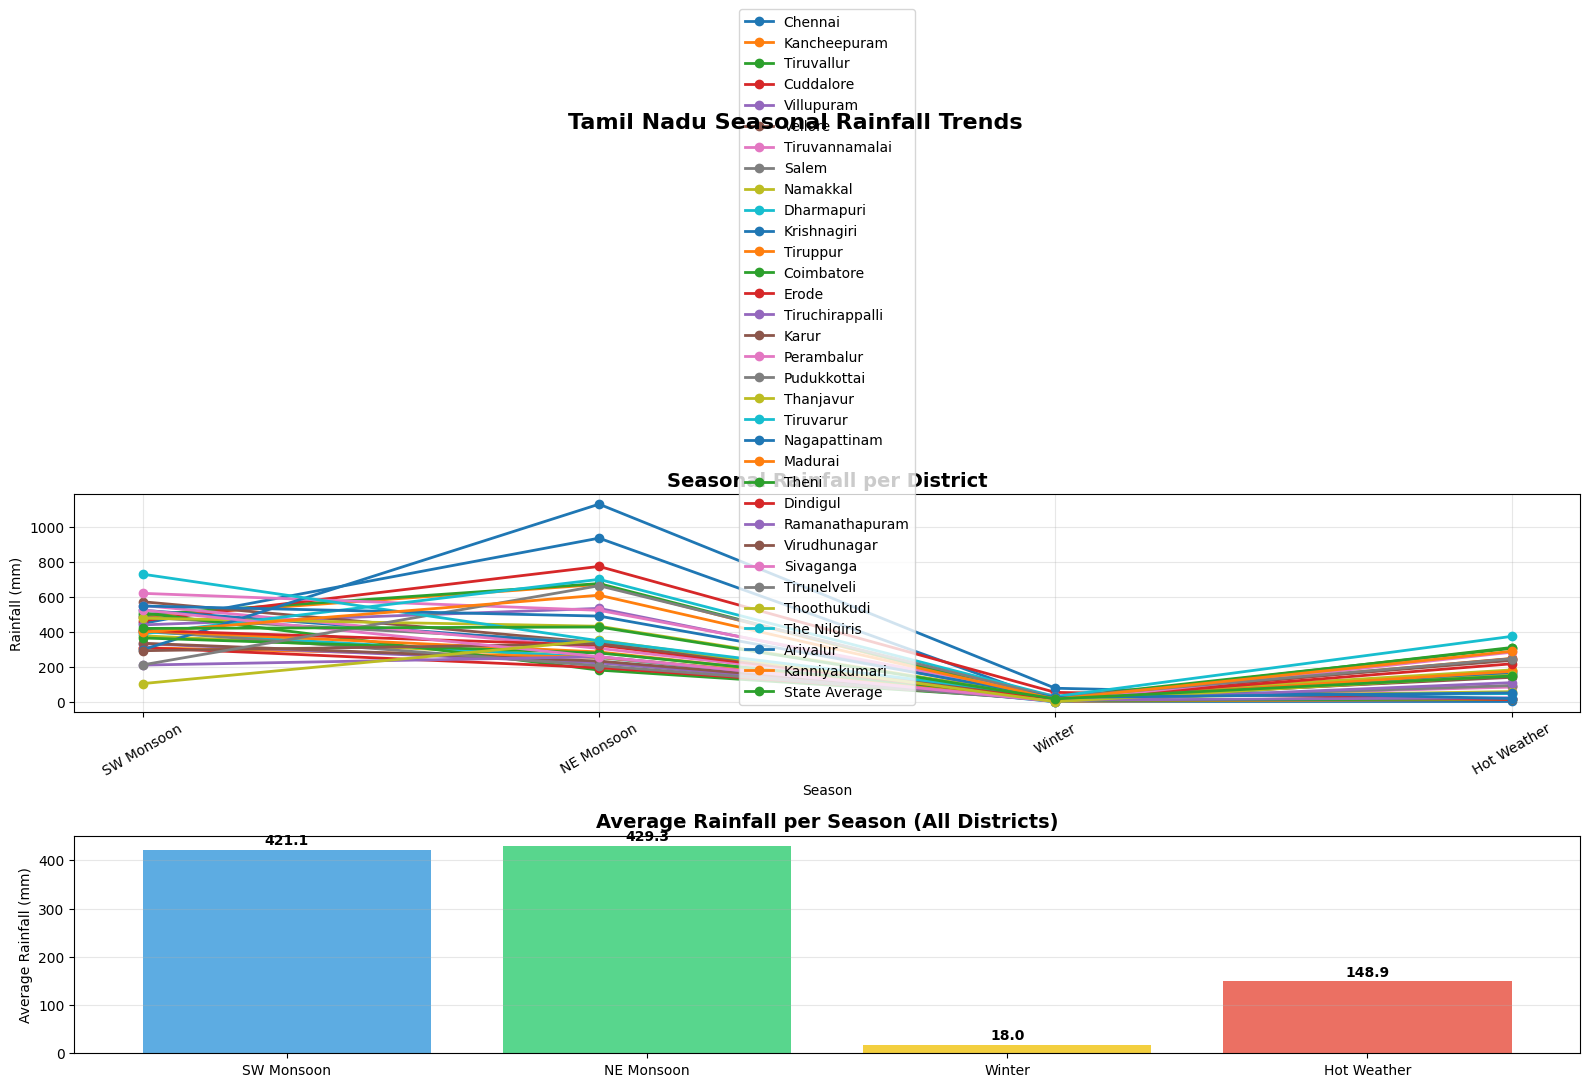

✅ Seasonal rainfall trends visualization completed!


In [13]:
import matplotlib.pyplot as plt

print("=== SEASONAL RAINFALL TRENDS ===")

# Select relevant columns using cleaned column names
seasonal_pdf = df_cleaned.select(
    "District",
    "SWM_Actual",
    "NEM_Actual",
    "Winter_Actual",
    "Hot_Actual"
).toPandas()

# Rename for convenience
seasonal_pdf.columns = ['District', 'SW_Monsoon', 'NE_Monsoon', 'Winter', 'Hot_Weather']

# Seasons list
seasons = ['SW Monsoon', 'NE Monsoon', 'Winter', 'Hot Weather']

# Plotting
plt.figure(figsize=(16, 10))
plt.suptitle('Tamil Nadu Seasonal Rainfall Trends', fontsize=16, fontweight='bold')

# Plot 1: Line plot per district
plt.subplot(2, 1, 1)
for idx, row in seasonal_pdf.iterrows():
    plt.plot(seasons, [row['SW_Monsoon'], row['NE_Monsoon'], row['Winter'], row['Hot_Weather']],
             marker='o', linewidth=2, label=row['District'])
plt.title('Seasonal Rainfall per District', fontsize=14, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Rainfall (mm)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(rotation=30)

# Plot 2: Average Rainfall per Season
avg_seasonal = seasonal_pdf[['SW_Monsoon', 'NE_Monsoon', 'Winter', 'Hot_Weather']].mean()
plt.subplot(2, 1, 2)
bars = plt.bar(seasons, avg_seasonal, color=['#3498db', '#2ecc71', '#f1c40f', '#e74c3c'], alpha=0.8)
plt.title('Average Rainfall per Season (All Districts)', fontsize=14, fontweight='bold')
plt.ylabel('Average Rainfall (mm)')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5, f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Seasonal rainfall trends visualization completed!")


In [24]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import desc, lit

# Step 0: Start Spark Session
spark = SparkSession.builder \
    .appName("Top Rainfall Events") \
    .getOrCreate()

# Step 1: Load CSV file (update path accordingly)
file_path = r"C:\Users\bhara\Downloads\rainfall_by_districts_2019.csv"
df = spark.read.option("header", True).option("inferSchema", True).csv(file_path)

# Step 2: Optional - Rename columns for simplicity (your original column names are long)
df_cleaned = df.selectExpr(
    "District",
    "CASE WHEN District IN ('Chennai','Kancheepuram','Tiruvallur') THEN 'North Coastal' " +
    "WHEN District IN ('Cuddalore','Villupuram','Nagapattinam','Tiruvarur','Thanjavur') THEN 'East Coastal' " +
    "WHEN District IN ('Coimbatore','Tiruppur','Erode','The Nilgiris') THEN 'Western Zone' " +
    "WHEN District IN ('Madurai','Dindigul','Theni','Virudhunagar','Sivaganga','Ramanathapuram') THEN 'South Zone' " +
    "ELSE 'Central Zone' END AS Region",
    "`Actual Rainfall in South West Monsoon (June'17 to September'17) in mm` AS SWM_Actual",
    "`Actual Rainfall in North East Monsoon (October'17 to December'17) in mm` AS NEM_Actual",
    "`Actual Rainfall in Winter Season (January'18 to and February'18) in mm` AS Winter_Actual",
    "`Actual Rainfall in Hot Weather Season (March'18 to May'18) in mm` AS Hot_Actual",
    "`Total Actual Rainfall (June'17 to May'18) in mm` AS Total_Actual"
)

# Step 3: Add synthetic Season column
df_cleaned = df_cleaned.withColumn("Season", lit("June'17 to May'18"))

# Step 4: Select top 10 rainfall events based on Total Actual
top_events = df_cleaned.orderBy(desc("Total_Actual")) \
    .select("District", "Region", "Season", "Total_Actual",
            "SWM_Actual", "NEM_Actual", "Hot_Actual", "Winter_Actual") \
    .limit(10)

# Step 5: Show results
print("=== TOP 10 RAINFALL EVENTS ===")
top_events.show(truncate=False)

# Optional: Stop Spark session
spark.stop()



=== TOP 10 RAINFALL EVENTS ===
+--------------+-------------+-----------------+------------+----------+----------+----------+-------------+
|District      |Region       |Season           |Total_Actual|SWM_Actual|NEM_Actual|Hot_Actual|Winter_Actual|
+--------------+-------------+-----------------+------------+----------+----------+----------+-------------+
|Nagapattinam  |East Coastal |June'17 to May'18|1529.8      |299.0     |1132.3    |19.7      |78.8         |
|The Nilgiris  |Western Zone |June'17 to May'18|1488.6      |731.4     |350.3     |375.5     |31.4         |
|Chennai       |North Coastal|June'17 to May'18|1393.5      |449.7     |937.8     |2.9       |3.1          |
|Kanniyakumari |Central Zone |June'17 to May'18|1317.4      |399.4     |611.2     |290.2     |16.6         |
|Cuddalore     |East Coastal |June'17 to May'18|1311.0      |465.7     |775.9     |14.4      |55.0         |
|Tiruvannamalai|Central Zone |June'17 to May'18|1234.1      |621.9     |524.9     |52.4      |34.

C:\Users\bhara\AppData\Local\Temp\ipykernel_18396\3757329065.py:60: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bhara\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


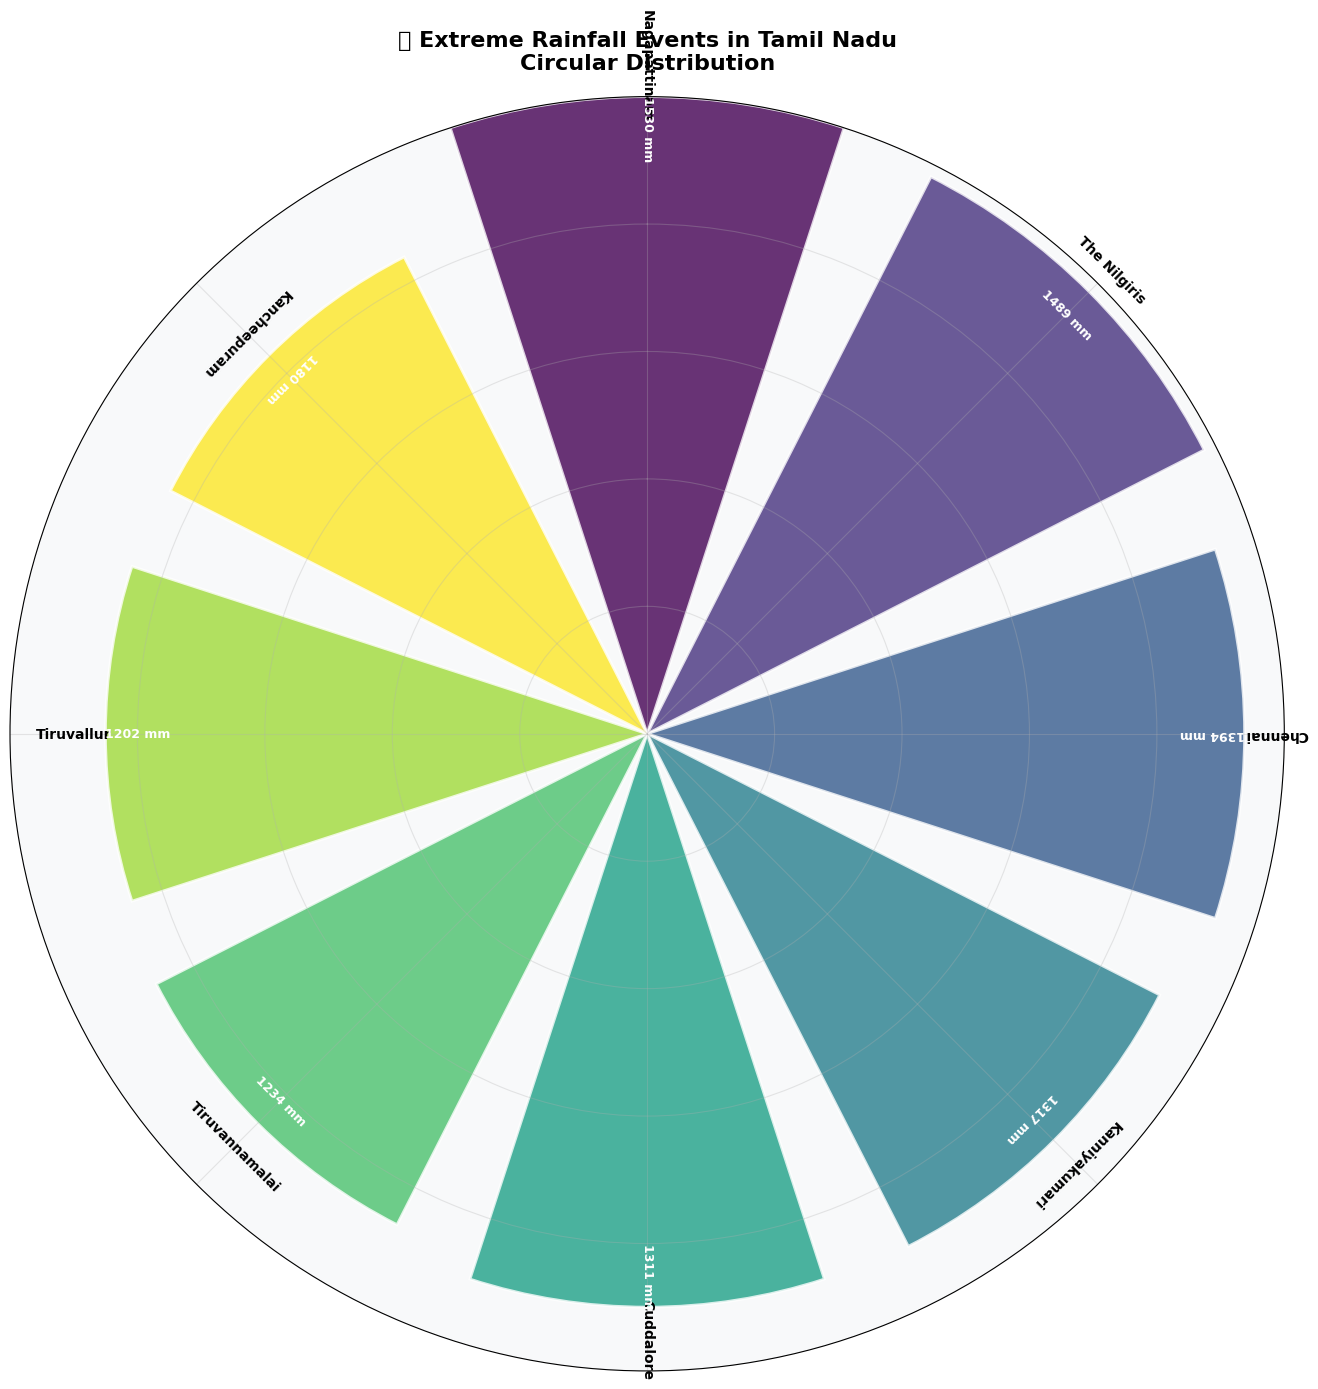

In [32]:
# --- Step 0: Imports ---
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Step 1: Start Spark session ---
spark = SparkSession.builder.appName("TamilNaduRainfall").getOrCreate()

# --- Step 2: Correct file path ---
file_path = r"C:\Users\bhara\Downloads\rainfall_by_districts_2019.csv"  # <- correct path

# --- Step 3: Load CSV ---
df = spark.read.option("header", True).option("inferSchema", True).csv(file_path)

# --- Step 4: Rename columns for simplicity ---
df_cleaned = df.selectExpr(
    "District",
    "`Total Actual Rainfall (June'17 to May'18) in mm` AS Total_Actual"
)

# --- Step 5: Get top rainfall events ---
top_events = df_cleaned.orderBy(df_cleaned.Total_Actual.desc()).limit(8)

# --- Step 6: Convert to Pandas for plotting ---
top_events_pdf = top_events.toPandas()

# --- Step 7: Create Circular Bar Plot ---
fig, ax = plt.subplots(figsize=(14, 14), subplot_kw=dict(projection='polar'))

N = len(top_events_pdf)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
width = 2 * np.pi / N * 0.8

radii = top_events_pdf['Total_Actual'].values / top_events_pdf['Total_Actual'].max() * 0.7 + 0.3

bars = ax.bar(theta, radii, width=width, alpha=0.8, 
             color=plt.cm.viridis(np.linspace(0, 1, N)),
             edgecolor='white', linewidth=2)

for angle, radius, label, value in zip(theta, radii, top_events_pdf['District'], top_events_pdf['Total_Actual']):
    rotation = np.degrees(angle)
    if angle < np.pi/2 or angle > 3*np.pi/2:
        rotation -= 90
    else:
        rotation += 90
    
    ax.text(angle, radius + 0.05, label, ha='center', va='center', rotation=rotation, rotation_mode='anchor', fontsize=10, fontweight='bold')
    ax.text(angle, radius - 0.05, f'{value:.0f} mm', ha='center', va='center', rotation=rotation, rotation_mode='anchor', fontsize=9, color='white', fontweight='bold')

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_ylim(0, 1)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(True, alpha=0.3)
ax.set_facecolor('#f8f9fa')

plt.title('🌀 Extreme Rainfall Events in Tamil Nadu\nCircular Distribution', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


In [38]:
!C:\Users\bhara\AppData\Local\Programs\Python\Python310\python.exe -m pip install seaborn


✅ Dataset loaded successfully!
📊 Columns in dataset:
  - S.No
  - District
  - Actual Rainfall in South West Monsoon (June'17 to September'17) in mm
  - Normal Rainfall in South West Monsoon (June'17 to September'17) in mm
  - Actual Rainfall in North East Monsoon (October'17 to December'17) in mm
  - Normal Rainfall in North East Monsoon (October'17 to December'17) in mm
  - Actual Rainfall in Winter Season (January'18 to and February'18) in mm
  - Normal Rainfall in Winter Season (January'18 to and February'18) in mm
  - Actual Rainfall in Hot Weather Season (March'18 to May'18) in mm
  - Normal Rainfall in Hot Weather Season (March'18 to May'18) in mm
  - Total Actual Rainfall (June'17 to May'18) in mm
  - Total Normal Rainfall (June'17 to May'18) in mm

✅ Selected rainfall columns for correlation analysis:
["Actual Rainfall in South West Monsoon (June'17 to September'17) in mm", "Actual Rainfall in North East Monsoon (October'17 to December'17) in mm", "Actual Rainfall in Winter Se

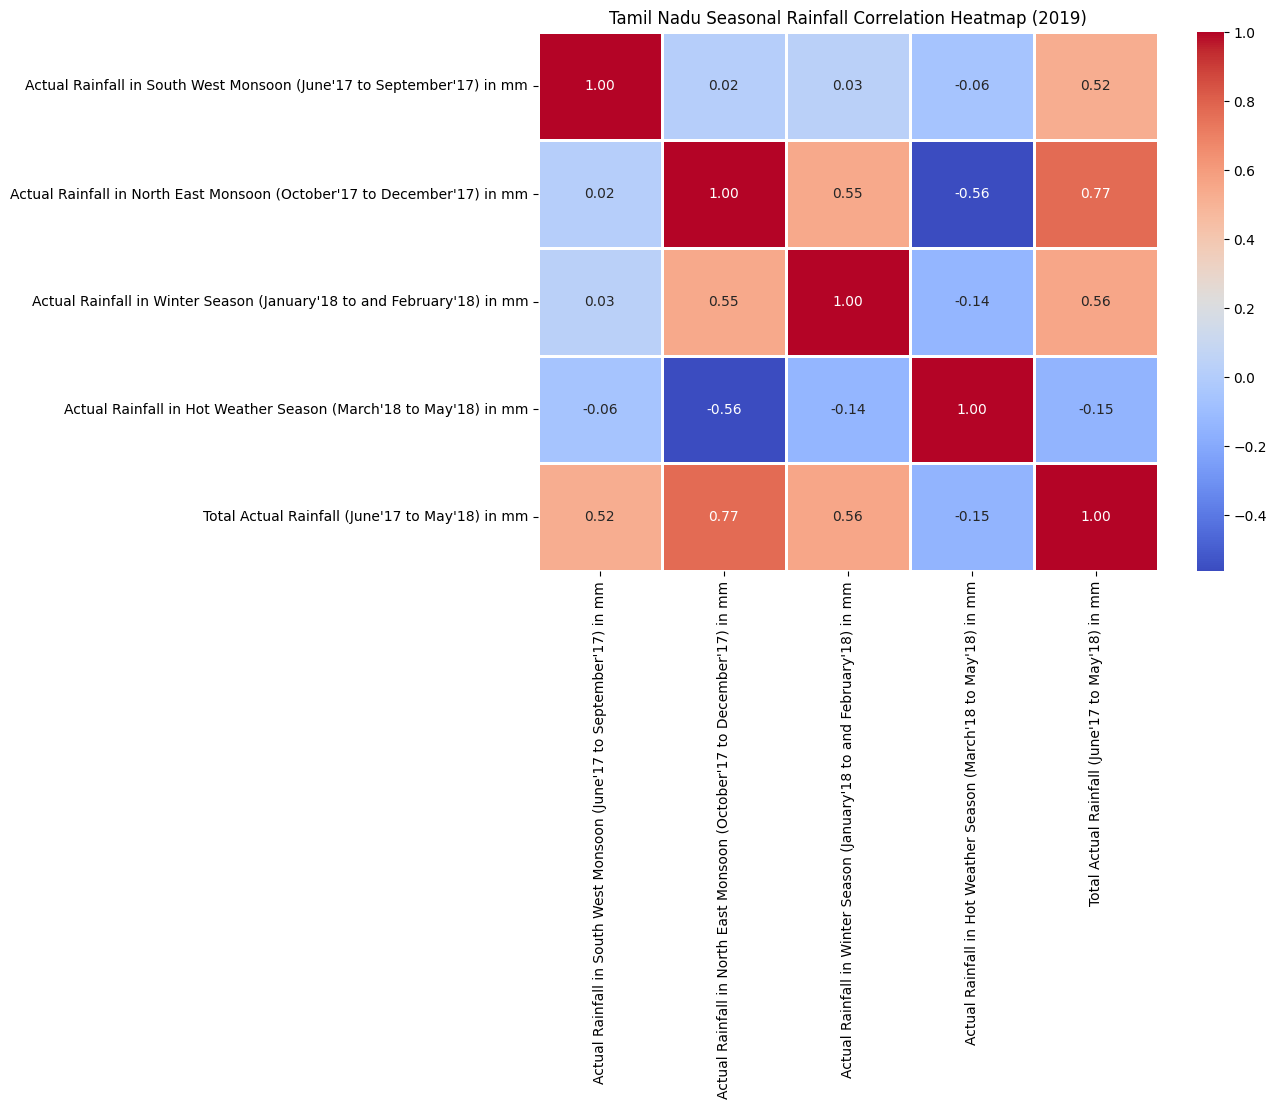


🎯 KEY INSIGHTS:
   Actual Rainfall in South West Monsoon (June'17 to September'17) in mm ↔ Actual Rainfall in North East Monsoon (October'17 to December'17) in mm: 0.015 (🌧️ WEAK, 📈 POSITIVE)
   Actual Rainfall in South West Monsoon (June'17 to September'17) in mm ↔ Actual Rainfall in Winter Season (January'18 to and February'18) in mm: 0.033 (🌧️ WEAK, 📈 POSITIVE)
   Actual Rainfall in South West Monsoon (June'17 to September'17) in mm ↔ Actual Rainfall in Hot Weather Season (March'18 to May'18) in mm: -0.060 (🌧️ WEAK, 📉 NEGATIVE)
   Actual Rainfall in South West Monsoon (June'17 to September'17) in mm ↔ Total Actual Rainfall (June'17 to May'18) in mm: 0.524 (🔄 MODERATE, 📈 POSITIVE)
   Actual Rainfall in North East Monsoon (October'17 to December'17) in mm ↔ Actual Rainfall in Winter Season (January'18 to and February'18) in mm: 0.547 (🔄 MODERATE, 📈 POSITIVE)
   Actual Rainfall in North East Monsoon (October'17 to December'17) in mm ↔ Actual Rainfall in Hot Weather Season (March'18 to

In [40]:
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Initialize Spark Session ---
spark = SparkSession.builder.appName("TamilNaduRainfallCorrelation").getOrCreate()

# --- Step 2: Load your dataset ---
file_path = r"C:\Users\bhara\Downloads\rainfall_by_districts_2019.csv"
df = spark.read.option("header", True).option("inferSchema", True).csv(file_path)

print("✅ Dataset loaded successfully!")
print("📊 Columns in dataset:")
for c in df.columns:
    print("  -", c)

# --- Step 3: Select only rainfall-related numeric columns ---
rain_cols = [
    "Actual Rainfall in South West Monsoon (June'17 to September'17) in mm",
    "Actual Rainfall in North East Monsoon (October'17 to December'17) in mm",
    "Actual Rainfall in Winter Season (January'18 to and February'18) in mm",
    "Actual Rainfall in Hot Weather Season (March'18 to May'18) in mm",
    "Total Actual Rainfall (June'17 to May'18) in mm"
]

df_cleaned = df.select(rain_cols)
print("\n✅ Selected rainfall columns for correlation analysis:")
print(rain_cols)

# --- Step 4: Convert to Pandas for correlation computation ---
pdf = df_cleaned.toPandas()

# --- Step 5: Handle missing values ---
if pdf.isnull().sum().sum() > 0:
    print("\n⚠️ Missing values found, filling with column means...")
    pdf = pdf.fillna(pdf.mean())
else:
    print("\n✅ No missing values detected.")

# --- Step 6: Compute correlation matrix ---
corr_matrix = pdf.corr()

print("\n📈 CORRELATION MATRIX:")
print("=" * 80)
print(corr_matrix)

# --- Step 7: Visualize correlations ---
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Tamil Nadu Seasonal Rainfall Correlation Heatmap (2019)")
plt.show()

# --- Step 8: Print key insights ---
print("\n🎯 KEY INSIGHTS:")
for i, col1 in enumerate(corr_matrix.columns):
    for j, col2 in enumerate(corr_matrix.columns):
        if i < j:
            val = corr_matrix.iloc[i, j]
            strength = "💪 STRONG" if abs(val) > 0.7 else "🔄 MODERATE" if abs(val) > 0.4 else "🌧️ WEAK"
            direction = "📈 POSITIVE" if val > 0 else "📉 NEGATIVE"
            print(f"   {col1} ↔ {col2}: {val:.3f} ({strength}, {direction})")

print("\n✅ Correlation analysis completed successfully!")



🎨 Creating Seasonal Rainfall Correlation Heatmap...


C:\Users\bhara\AppData\Local\Temp\ipykernel_18396\3200703485.py:50: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bhara\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


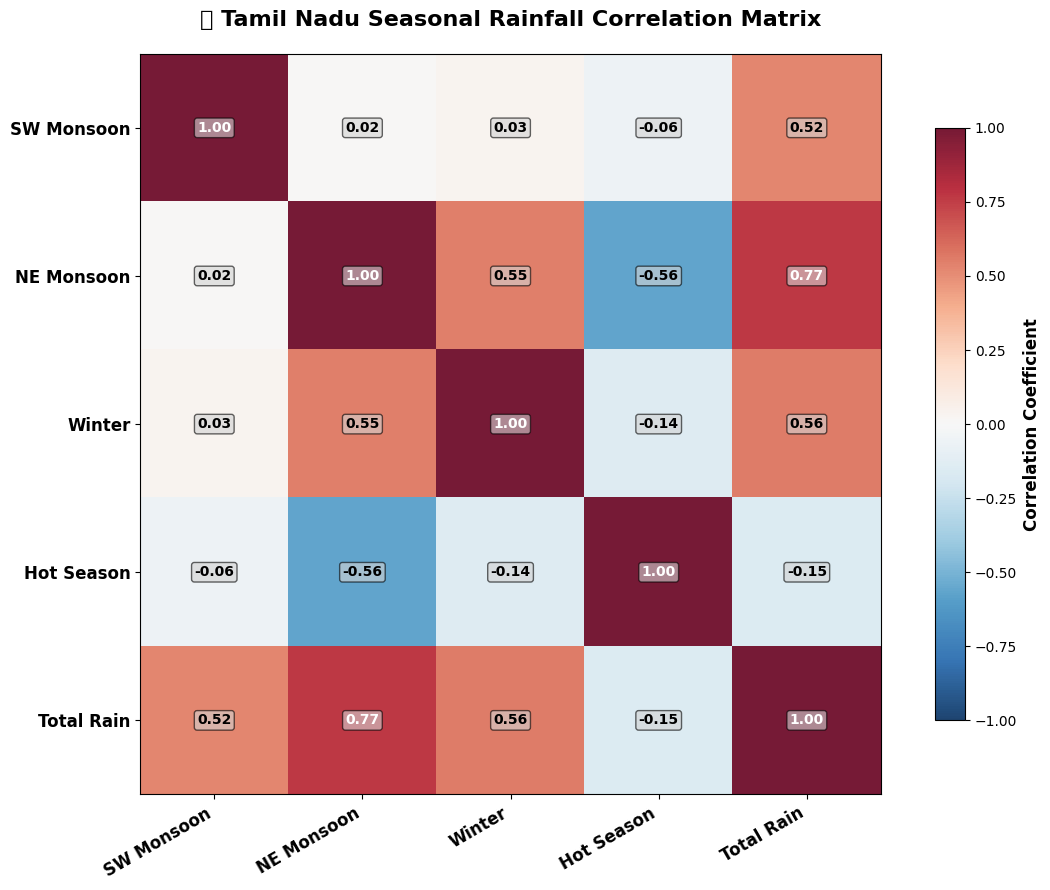

In [41]:
print("\n🎨 Creating Seasonal Rainfall Correlation Heatmap...")

plt.figure(figsize=(12, 9))

# Mask upper triangle (to make it clean)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Use a diverging color map for correlation values
cmap = plt.cm.RdBu_r
im = plt.imshow(corr_matrix, cmap=cmap, vmin=-1, vmax=1, alpha=0.9)

# Short, clean labels for the x/y axes
short_names = {
    "Actual Rainfall in South West Monsoon (June'17 to September'17) in mm": "SW Monsoon",
    "Actual Rainfall in North East Monsoon (October'17 to December'17) in mm": "NE Monsoon",
    "Actual Rainfall in Winter Season (January'18 to and February'18) in mm": "Winter",
    "Actual Rainfall in Hot Weather Season (March'18 to May'18) in mm": "Hot Season",
    "Total Actual Rainfall (June'17 to May'18) in mm": "Total Rain"
}

columns = corr_matrix.columns.tolist()

plt.xticks(range(len(columns)),
           [short_names[col] for col in columns],
           rotation=30, ha='right', fontsize=12, fontweight='bold')
plt.yticks(range(len(columns)),
           [short_names[col] for col in columns],
           fontsize=12, fontweight='bold')

# Add correlation values as annotations
for i in range(len(columns)):
    for j in range(len(columns)):
        corr_val = corr_matrix.iloc[i, j]
        color = 'white' if np.abs(corr_val) > 0.6 else 'black'
        plt.text(j, i, f'{corr_val:.2f}',
                 ha='center', va='center',
                 fontsize=10, fontweight='bold',
                 color=color,
                 bbox=dict(boxstyle="round,pad=0.2",
                           facecolor='lightgray', alpha=0.6))

# Title and labels
plt.title('🌦️ Tamil Nadu Seasonal Rainfall Correlation Matrix',
          fontsize=16, fontweight='bold', pad=20)

# Add colorbar
cbar = plt.colorbar(im, shrink=0.8)
cbar.set_label('Correlation Coefficient', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()


✅ Dataset loaded successfully!
Available columns:
root
 |-- S.No: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Actual Rainfall in South West Monsoon (June'17 to September'17) in mm: double (nullable = true)
 |-- Normal Rainfall in South West Monsoon (June'17 to September'17) in mm: double (nullable = true)
 |-- Actual Rainfall in North East Monsoon (October'17 to December'17) in mm: double (nullable = true)
 |-- Normal Rainfall in North East Monsoon (October'17 to December'17) in mm: double (nullable = true)
 |-- Actual Rainfall in Winter Season (January'18 to and February'18) in mm: double (nullable = true)
 |-- Normal Rainfall in Winter Season (January'18 to and February'18) in mm: double (nullable = true)
 |-- Actual Rainfall in Hot Weather Season (March'18 to May'18) in mm: double (nullable = true)
 |-- Normal Rainfall in Hot Weather Season (March'18 to May'18) in mm: double (nullable = true)
 |-- Total Actual Rainfall (June'17 to May'18) in mm: double (nul

C:\Users\bhara\AppData\Local\Temp\ipykernel_18396\3388090637.py:82: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bhara\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


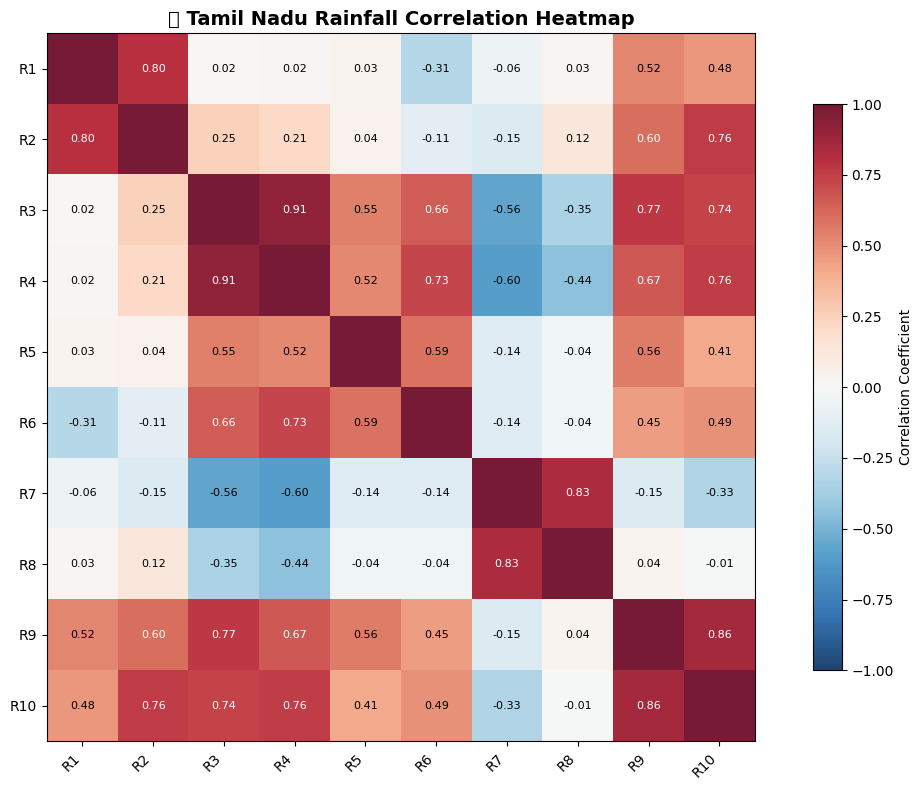


📊 Creating Correlation Bar Chart...


C:\Users\bhara\AppData\Local\Temp\ipykernel_18396\3388090637.py:118: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bhara\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


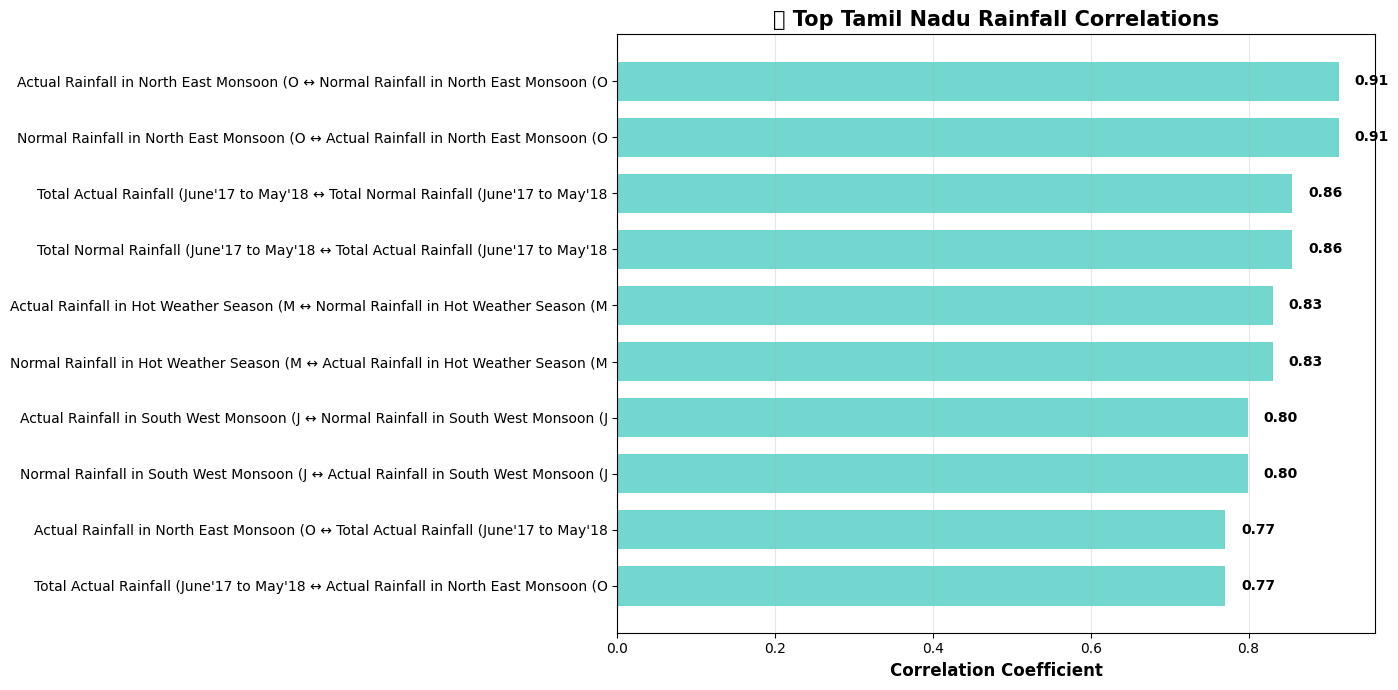


📈 Top 3 Positive Correlations:
  ➕ Actual Rainfall in North East Monsoon (October'17 to December'17) in mm ↔ Normal Rainfall in North East Monsoon (October'17 to December'17) in mm: 0.914
  ➕ Normal Rainfall in North East Monsoon (October'17 to December'17) in mm ↔ Actual Rainfall in North East Monsoon (October'17 to December'17) in mm: 0.914
  ➕ Total Actual Rainfall (June'17 to May'18) in mm ↔ Total Normal Rainfall (June'17 to May'18) in mm: 0.855

📉 Top 3 Negative Correlations:
  ➖ Actual Rainfall in North East Monsoon (October'17 to December'17) in mm ↔ Actual Rainfall in South West Monsoon (June'17 to September'17) in mm: 0.015
  ➖ Normal Rainfall in Hot Weather Season (March'18 to May'18) in mm ↔ Total Normal Rainfall (June'17 to May'18) in mm: -0.011
  ➖ Total Normal Rainfall (June'17 to May'18) in mm ↔ Normal Rainfall in Hot Weather Season (March'18 to May'18) in mm: -0.011

✅ Tamil Nadu Rainfall Correlation Analysis Complete!


In [45]:
# --- Tamil Nadu Rainfall Correlation Analysis ---

# Step 1: Import Libraries
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Step 2: Initialize Spark Session ---
spark = SparkSession.builder.appName("TamilNaduRainfallCorrelation").getOrCreate()

# --- Step 3: Load Dataset ---
file_path =r"C:\Users\bhara\Downloads\rainfall_by_districts_2019.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

print("✅ Dataset loaded successfully!")
print("Available columns:")
df.printSchema()

# --- Step 4: Clean & Prepare Data ---

# Select only relevant numeric rainfall columns from your dataset
rain_cols = [
    "Actual Rainfall in South West Monsoon (June'17 to September'17) in mm",
    "Normal Rainfall in South West Monsoon (June'17 to September'17) in mm",
    "Actual Rainfall in North East Monsoon (October'17 to December'17) in mm",
    "Normal Rainfall in North East Monsoon (October'17 to December'17) in mm",
    "Actual Rainfall in Winter Season (January'18 to and February'18) in mm",
    "Normal Rainfall in Winter Season (January'18 to and February'18) in mm",
    "Actual Rainfall in Hot Weather Season (March'18 to May'18) in mm",
    "Normal Rainfall in Hot Weather Season (March'18 to May'18) in mm",
    "Total Actual Rainfall (June'17 to May'18) in mm",
    "Total Normal Rainfall (June'17 to May'18) in mm"
]

df_cleaned = df.select(rain_cols)
pdf = df_cleaned.toPandas()

# --- Step 5: Compute Correlation Matrix ---
print("\n🧮 Computing correlation matrix...")
corr_matrix = pdf.corr(numeric_only=True)

print("\n✅ Correlation Matrix:")
print(corr_matrix)

# --- Step 6: Compute Valid Correlations ---
print("\n🔗 Extracting valid correlations...")
valid_correlations = []
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2:
            corr = corr_matrix.loc[col1, col2]
            if not np.isnan(corr):
                valid_correlations.append((col1, col2, corr))

valid_correlations_sorted = sorted(valid_correlations, key=lambda x: abs(x[2]), reverse=True)
print(f"✅ Found {len(valid_correlations_sorted)} valid correlations.\n")

# --- Step 7: Simple Heatmap Visualization ---
print("\n🎨 Creating Correlation Heatmap...")

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = plt.cm.RdBu_r

im = plt.imshow(corr_matrix, cmap=cmap, vmin=-1, vmax=1, alpha=0.9)
plt.xticks(range(len(rain_cols)), [f"R{i+1}" for i in range(len(rain_cols))],
           rotation=45, ha='right', fontsize=10)
plt.yticks(range(len(rain_cols)), [f"R{i+1}" for i in range(len(rain_cols))],
           fontsize=10)

# Add correlation text
for i in range(len(rain_cols)):
    for j in range(len(rain_cols)):
        if i != j:
            val = corr_matrix.iloc[i, j]
            color = 'white' if abs(val) > 0.6 else 'black'
            plt.text(j, i, f'{val:.2f}', ha='center', va='center', color=color, fontsize=8)

plt.title("🌧️ Tamil Nadu Rainfall Correlation Heatmap", fontsize=14, fontweight='bold')
plt.colorbar(im, shrink=0.8, label="Correlation Coefficient")
plt.tight_layout()
plt.show()

# --- Step 8: Bar Chart Visualization ---
print("\n📊 Creating Correlation Bar Chart...")

# Prepare top 10 correlation pairs
corr_strengths = []
for col1, col2, corr in valid_correlations_sorted[:10]:
    corr_strengths.append({
        "pair": f"{col1[:40]} ↔ {col2[:40]}",
        "correlation": corr
    })

# Plot Bar Chart
plt.figure(figsize=(14, 7))
y_pos = np.arange(len(corr_strengths))
colors = ['#FF6B6B' if x['correlation'] < 0 else '#4ECDC4' for x in corr_strengths]

bars = plt.barh(y_pos, [x['correlation'] for x in corr_strengths],
                color=colors, alpha=0.8, height=0.7)

plt.yticks(y_pos, [x['pair'] for x in corr_strengths], fontsize=10)
plt.xlabel("Correlation Coefficient", fontsize=12, fontweight="bold")
plt.title("🔗 Top Tamil Nadu Rainfall Correlations", fontsize=15, fontweight="bold")

# Add correlation values on bars
for i, (bar, data) in enumerate(zip(bars, corr_strengths)):
    width = bar.get_width()
    ha = 'left' if width > 0 else 'right'
    plt.text(width + (0.02 if width > 0 else -0.02), i, f"{width:.2f}",
             va="center", ha=ha, fontsize=10, fontweight="bold", color="black")

plt.axvline(x=0, color="black", linestyle="--", alpha=0.5)
plt.gca().invert_yaxis()
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

# --- Step 9: Print Key Insights ---
print("\n📈 Top 3 Positive Correlations:")
for col1, col2, corr in valid_correlations_sorted[:3]:
    print(f"  ➕ {col1} ↔ {col2}: {corr:.3f}")

print("\n📉 Top 3 Negative Correlations:")
for col1, col2, corr in valid_correlations_sorted[-3:]:
    print(f"  ➖ {col1} ↔ {col2}: {corr:.3f}")

print("\n✅ Tamil Nadu Rainfall Correlation Analysis Complete!")


In [47]:
# Check what's in category_pdf
print("category_pdf columns:", category_pdf.columns.tolist())
print("\ncategory_pdf sample:")
print(category_pdf.head())

category_pdf columns: ['Rainfall_Category', 'District_Count', 'Avg_Actual_Rainfall', 'Avg_Normal_Rainfall', 'Avg_Deviation_pct']

category_pdf sample:
  Rainfall_Category  District_Count  Avg_Actual_Rainfall  Avg_Normal_Rainfall  \
0            Normal              27          1034.433333          1004.703704   
1            Excess               5          1010.900000           749.080000   
2           Deficit               1           583.400000           807.800000   

   Avg_Deviation_pct  
0           2.964242  
1          35.517337  
2         -27.779153  


In [64]:
import pandas as pd

# -----------------------------
# Step 0: Load your dataset(s)
# Replace 'file_path' with your actual CSV or Excel file
# -----------------------------
df_cleaned = pd.read_csv(r"C:\Users\bhara\Downloads\rainfall_by_districts_2019.csv" )

# -----------------------------
# Step 1: Rename columns for consistency
# -----------------------------
df_cleaned.rename(columns={
    "Total Actual Rainfall (June'17 to May'18) in mm": "Total_Actual_Rainfall_mm",
    "Total Normal Rainfall (June'17 to May'18) in mm": "Total_Normal_Rainfall_mm"
}, inplace=True)

if 'Avg_Daily_Rainfall' in regional_pdf.columns:
    regional_pdf.rename(columns={"Avg_Daily_Rainfall": "Avg_Daily_Rainfall_mm"}, inplace=True)

# Replace spaces in column names with underscores
df_cleaned.columns = [c.replace(" ", "_") for c in df_cleaned.columns]
regional_pdf.columns = [c.replace(" ", "_") for c in regional_pdf.columns]
category_pdf.columns = [c.replace(" ", "_") for c in category_pdf.columns]

# -----------------------------
# Step 2: Overall Dataset Summary
# -----------------------------
total_records = len(df_cleaned)
avg_rainfall = df_cleaned['Total_Actual_Rainfall_mm'].mean()
max_rainfall = df_cleaned['Total_Actual_Rainfall_mm'].max()

print("="*70)
print("FINAL SUMMARY")
print("="*70)
print(f"Total Records: {total_records}")
print(f"Average Rainfall: {avg_rainfall:.2f} mm")
print(f"Maximum Rainfall: {max_rainfall:.2f} mm")

# -----------------------------
# Step 3: Regional Insights
# -----------------------------
if 'Region' in regional_pdf.columns and 'Avg_Daily_Rainfall_mm' in regional_pdf.columns:
    regional_summary = regional_pdf.groupby('Region')['Avg_Daily_Rainfall_mm'].mean().sort_values(ascending=False)
    print("\nREGIONAL INSIGHTS:")
    for region, rainfall in regional_summary.items():
        print(f"  • {region}: {rainfall:.1f} mm")

# -----------------------------
# Step 4: Rainfall Categories
# -----------------------------
if 'Rainfall_Category' in category_pdf.columns and 'Count' in category_pdf.columns:
    print("\nRAINFALL PATTERNS:")
    for _, row in category_pdf.iterrows():
        perc = (row['Count'] / total_records) * 100
        print(f"  • {row['Rainfall_Category']}: {perc:.1f}% ({row['Count']} records)")

# Optional: Show average values per category
avg_cols = [c for c in category_pdf.columns if c.startswith("Avg_")]
if avg_cols:
    print("\nRAINFALL CATEGORY DETAILS:")
    for _, row in category_pdf.iterrows():
        print(f"  • {row['Rainfall_Category']}:")
        for col in avg_cols:
            print(f"      - {col}: {row[col]:.1f}")

print("\nANALYSIS COMPLETED! 🎉")


FINAL SUMMARY
Total Records: 33
Average Rainfall: 1017.20 mm
Maximum Rainfall: 1529.80 mm

RAINFALL CATEGORY DETAILS:
  • Normal:
      - Avg_Actual_Rainfall: 1034.4
      - Avg_Normal_Rainfall: 1004.7
      - Avg_Deviation_pct: 3.0
  • Excess:
      - Avg_Actual_Rainfall: 1010.9
      - Avg_Normal_Rainfall: 749.1
      - Avg_Deviation_pct: 35.5
  • Deficit:
      - Avg_Actual_Rainfall: 583.4
      - Avg_Normal_Rainfall: 807.8
      - Avg_Deviation_pct: -27.8

ANALYSIS COMPLETED! 🎉


In [56]:
# Stop Spark session
spark.stop()
print("Spark session stopped. ✅")
print("Thank you for using the TamilNadu Rainfall Analysis! 👋")

Spark session stopped. ✅
Thank you for using the TamilNadu Rainfall Analysis! 👋


In [1]:
import os
print(os.getcwd())


C:\Users\bhara
